<a href="https://colab.research.google.com/github/ibrahimyrao/data-visualization/blob/main/datav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests
from io import StringIO

data_url = 'https://drive.google.com/uc?export=download&id=1AY5xAeQUyAVZnIR2ZfKW7YN1x8q4VxuX'  # Updated URL

# Download the file content using requests
response = requests.get(data_url)
response.raise_for_status()  # Raise an exception for bad responses

# Read the content into a Pandas DataFrame
dataset = pd.read_csv(StringIO(response.text))

dataset.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


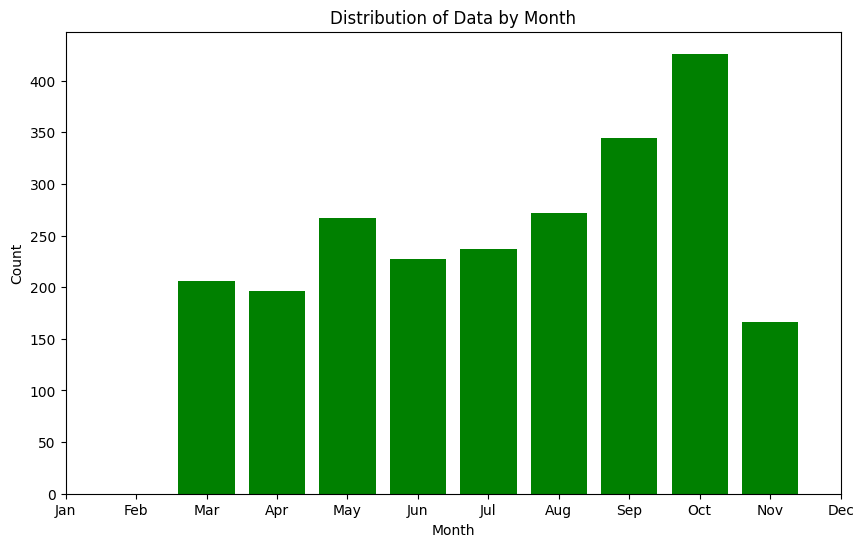

In [84]:
# Assuming 'dataset' is your DataFrame and 'date' is the column with dates
# Convert the 'date' column to datetime objects if it's not already
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract the month from the 'date' column
dataset['month'] = dataset['date'].dt.month

# Group by month and count occurrences
monthly_counts = dataset.groupby('month')['month'].count()

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(monthly_counts.index, monthly_counts.values, color='green')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Data by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

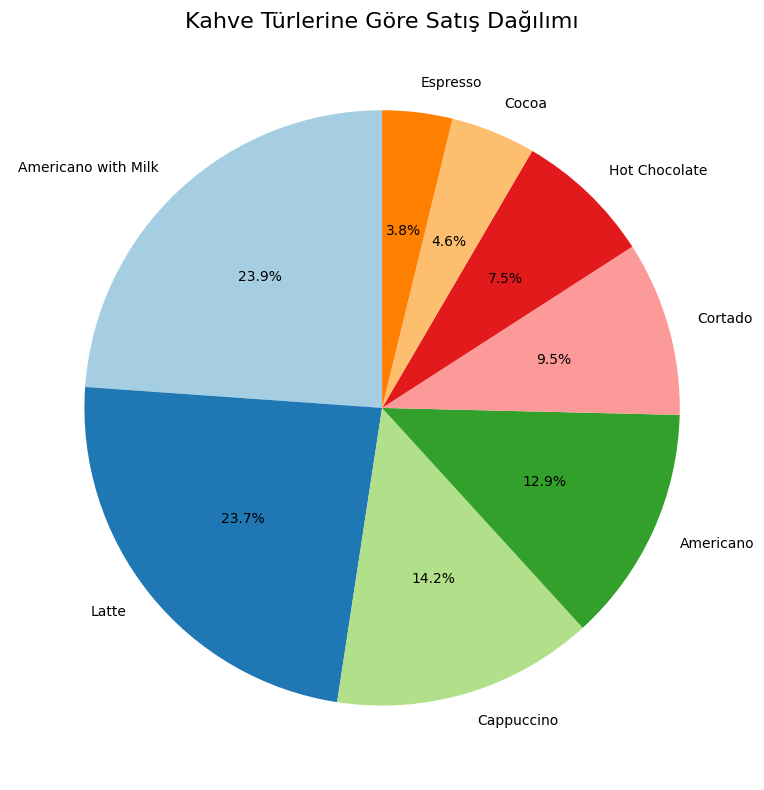

In [85]:
# Kahve Türlerine Göre Satış Dağılımını Gösteren Pasta Grafiği
# Kahve türlerine göre satış sayısını gruplama
coffee_sales = dataset['coffee_name'].value_counts()

# Pasta grafiği oluşturma
plt.figure(figsize=(10, 8))
coffee_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Grafik Başlıkları
plt.title("Kahve Türlerine Göre Satış Dağılımı", fontsize=16)
plt.ylabel("")  # Y etiketini kaldırıyoruz

# Görselleştirme
plt.tight_layout()
plt.show()


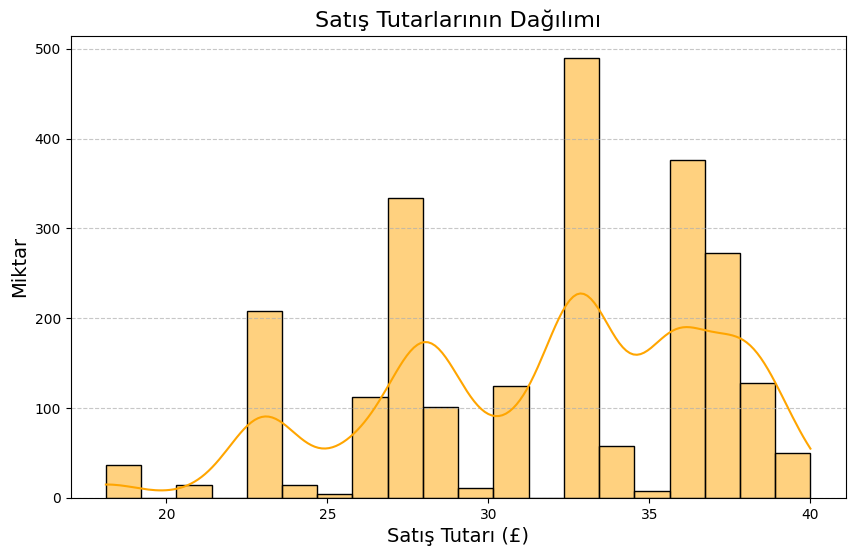

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Satış Tutarlarının Dağılımını Gösteren Histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset['money'], bins=20, kde=True, color='orange')

# Grafik Başlıkları ve Etiketler
plt.title("Satış Tutarlarının Dağılımı", fontsize=16)
plt.xlabel("Satış Tutarı (£)", fontsize=14)
plt.ylabel("Miktar", fontsize=14)

# Görselleştirme
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


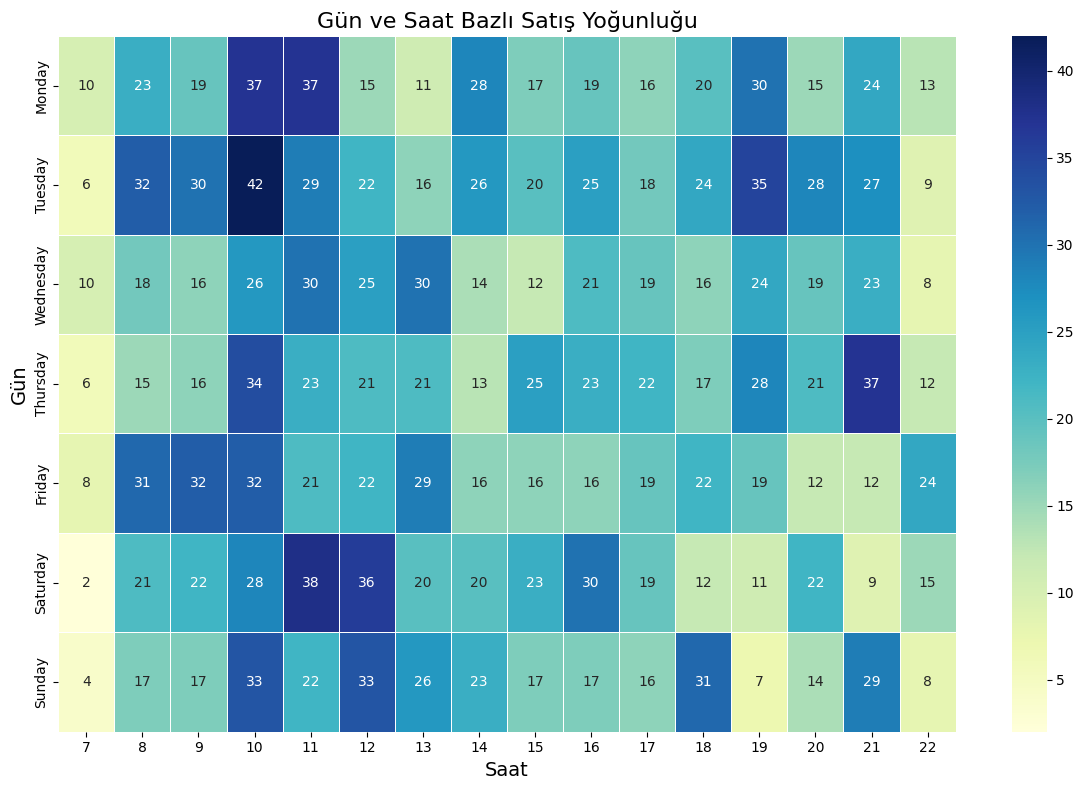

In [87]:
# Gün ve Saat Bazlı Satış Yoğunluğunu Gösteren Isı Haritası
# Öncelikle datetime sütunundan saat ve gün bilgilerini çıkartıyoruz
dataset['hour'] = pd.to_datetime(dataset['datetime']).dt.hour
dataset['day'] = pd.to_datetime(dataset['datetime']).dt.day_name()

# Saat ve gün bazında işlem sayısını gruplama
heatmap_data = dataset.groupby(['day', 'hour']).size().unstack(fill_value=0)

# Haftanın günlerini sıralamak için günlerin sırasını belirliyoruz
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

# Isı haritası oluşturma
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='d', linewidths=0.5)

# Grafik Başlıkları ve Etiketler
plt.title("Gün ve Saat Bazlı Satış Yoğunluğu", fontsize=16)
plt.xlabel("Saat", fontsize=14)
plt.ylabel("Gün", fontsize=14)

# Görselleştirme
plt.tight_layout()
plt.show()


In [88]:
import plotly.graph_objects as go

# Günlük toplam satışları hesaplama
daily_sales = dataset.groupby('date')['money'].sum()

# Grafik için X ve Y eksen verisi
x = daily_sales.index
y = daily_sales.values

# Zoom grafiği (plotly)
fig = go.Figure()

# Çizgi grafiği ekleme
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Satış Tutarı'))

# Başlık ve eksen etiketleri
fig.update_layout(
    title="Günlük Satışlar",
    xaxis_title="Tarih",
    yaxis_title="Toplam Satış Tutarı (TL)",
    xaxis_rangeslider_visible=True,  # Zoom için range slider'ı etkinleştir
    template="plotly_dark"  # Grafik için görsel stil
)

# Görselleştirme
fig.show()
